In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import imtools

In [43]:
pil_im = Image.open("data/empire.jpg")

PILのshow()

In [44]:
pil_im.show() # デフォルトアプリケーションが設定されていないと，エラー．2回目以降は正常に表示される．

NumPyのimshow()

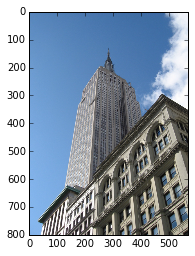

In [45]:
imshow(np.asarray(pil_im))

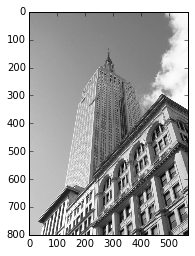

In [46]:
imshow(np.asarray(pil_im.convert('L')), cmap=matplotlib.cm.Greys_r) # Grayscale

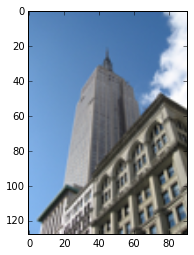

In [30]:
pil_im = Image.open("data/empire.jpg")
pil_im.thumbnail((128,128))
pil_im.show()
imshow(np.asarray(pil_im))

crop, rotate, paste to original image

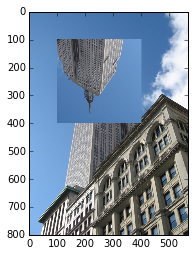

In [31]:
pil_im = Image.open("data/empire.jpg")
box = (100, 100, 400, 400)
region = pil_im.crop(box)
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region, box)
imshow(np.asarray(pil_im))

resize, rotate

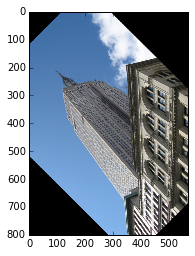

In [33]:
pil_im = Image.open("data/empire.jpg")
out = pil_im.resize((128,128))
out = pil_im.rotate(45)
imshow(np.asarray(out))

## 1.2 Matplotlob

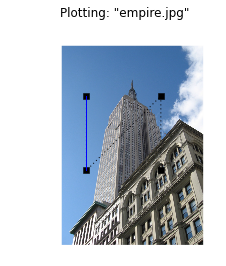

In [35]:
im = array(Image.open("data/empire.jpg"))
imshow(im)
x = [100, 100, 400, 400]
y = [200, 500, 200, 500]
plot(x, y,'ks:')
plot(x[:2], y[:2])
title('Plotting: "empire.jpg"')
axis('off')
show()

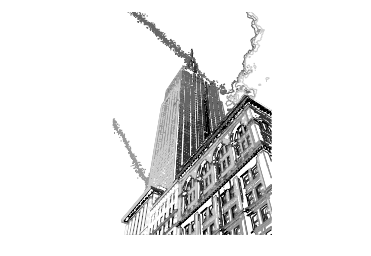

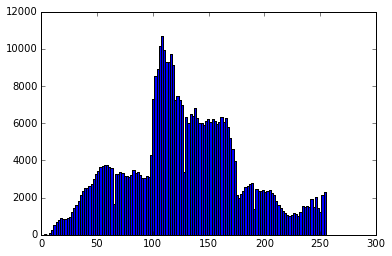

In [36]:
im = array(Image.open("data/empire.jpg").convert('L'))
figure()
gray()
contour(im, origin='image')
axis('equal')
axis('off')
show()
figure()
hist(im.flatten(), 128)
show()

In [ ]:
# im = array(Image.open("data/empire.jpg"))
# imshow(im)
# print("Please click 3 points")
# x = ginput(3)
# print("you clicked:", x)
# show()

## Numpy

(800, 569, 3) uint8
(800, 569) float32
3 255
0 252
101 200
0 255


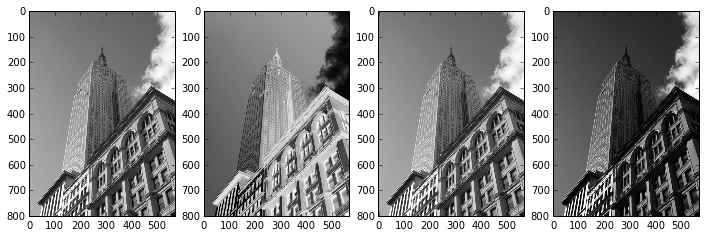

In [54]:
im = array(Image.open("data/empire.jpg"))
print(im.shape, im.dtype)

im = array(Image.open("data/empire.jpg").convert('L'), 'f')
print(im.shape, im.dtype)

im2 = 255 - im
im3 = (100.0/255)*im + 100
im4 = 255.0 * (im/255.0)**2
for i in [im, im2, im3, im4]:
    print(int(i.min()), int(i.max()))

fig, axs = plt.subplots(1,4, figsize=(12, 4))
for i, img in enumerate([im, im2, im3, im4]):
    axs[i].imshow(img)
    

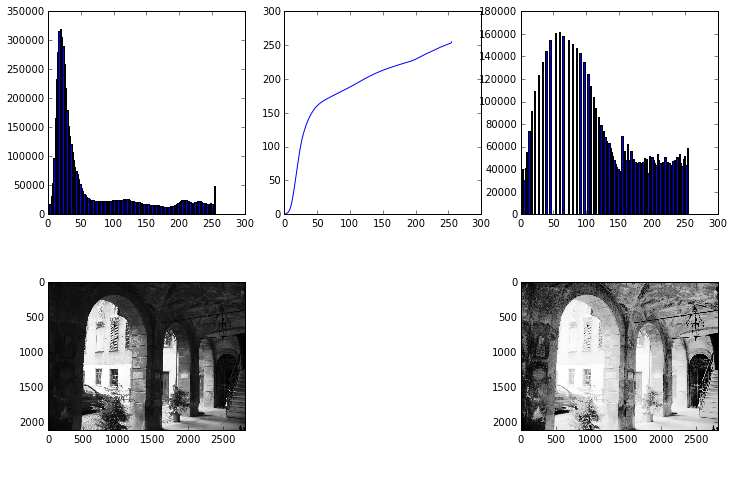

In [63]:
im = array(Image.open("data/AquaTermi_lowcontrast.jpg").convert('L'))
im2, cdf = imtools.histeq(im)
fig, axs = plt.subplots(2,3, figsize=(12, 8))

axs[0, 0].hist(im.flatten(), 128)
axs[1, 0].imshow(im, cmap=matplotlib.cm.Greys_r)
axs[0, 1].plot(cdf)
axs[1, 1].axis('off')
axs[0, 2].hist(im2.flatten(), 128)
axs[1, 2].imshow(im2, cmap=matplotlib.cm.Greys_r)

### Averaging Images

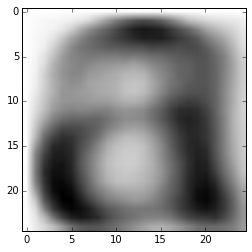

In [5]:
imdir = "data/fontimages/a_thumbs"
imlist = [os.path.join(imdir, f) for f in os.listdir(imdir)]
immean = imtools.compute_average(imlist)
plt.imshow(immean, cmap=plt.cm.Greys_r)

### PCA

In [5]:
import pca

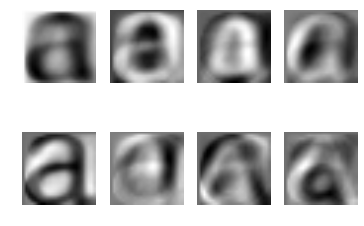

In [6]:
imdir = "data/fontimages/a_thumbs"
imlist = [os.path.join(imdir, f) for f in os.listdir(imdir)]
im = np.array(Image.open(imlist[0]))
m, n = im.shape[0:2]
imnbr = len(imlist)

immatrix = np.array([np.array(Image.open(im)).flatten() for im in imlist], 'f')

V, S, immean = pca.pca(immatrix)

plt.figure()
plt.gray()
plt.subplot(2, 4, 1)
plt.axis("off")
plt.imshow(immean.reshape(m, n))
for i in range(7):
    plt.subplot(2, 4, i+2)
    plt.axis("off")
    plt.imshow(V[i].reshape(m, n))

plt.show()

### Pickle Module

Save object

In [7]:
import pickle
with open('font_pca_modes.pkl', 'wb') as f:
    pickle.dump(immean, f)
    pickle.dump(V, f)

Load object

保存した順番で取り出す．

In [8]:
with open('font_pca_modes.pkl', 'rb') as f:
    immean = pickle.load(f)
    V = pickle.load(f)

## SciPy

### Blurring Images

* for gray image

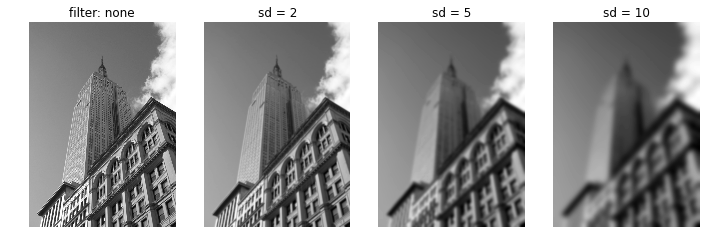

In [23]:
from scipy.ndimage import filters
im = np.array(Image.open("data/empire.jpg").convert('L'))
plt.figure(figsize=(12, 4))
plt.gray()
plt.subplot(1, 4, 1)
plt.axis('off')
plt.title('filter: none')
plt.imshow(im)
for (i, j) in enumerate([2, 5, 10]):
    im2 = filters.gaussian_filter(im, j) # 2nd parameter: standard diviasion
    plt.subplot(1, 4, i+2)
    plt.axis('off')
    plt.title('sd = {}'.format(j))
    plt.imshow(im2)

plt.show()

* for color image

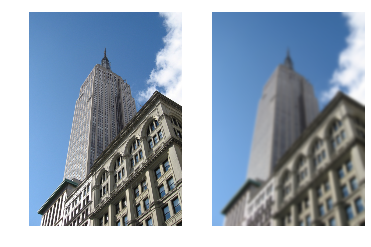

In [20]:
im = np.array(Image.open("data/empire.jpg"))
im2 = np.zeros(im.shape)
for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i], 5)
im2 = np.uint8(im2)

plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(im)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(im2)
plt.show()

### Image Derivatives

* intensity change
    * x and y derivative

* x and y derivative
    * discrete approximations
    * convolutions
        * Prewitt filters
        * Sobel filters

* image gradiant
    * gradiant magunitude
    * gradiant angle

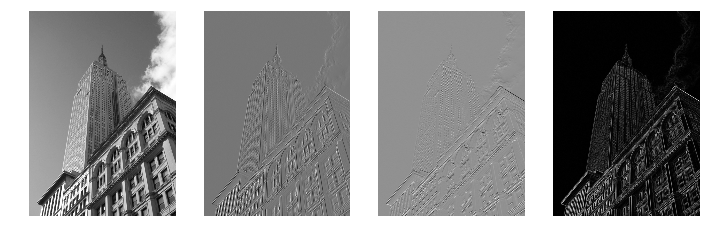

In [17]:
from scipy.ndimage import filters

im = np.array(Image.open("data/empire.jpg").convert('L'))

imx = np.zeros(im.shape) # 800 x 569
filters.sobel(im, 1, imx) # sobel(image, x or y, output)

imy = np.zeros(im.shape)
filters.sobel(im, 0, imy)

magnitude = np.sqrt(imx**2 + imy**2)

plt.figure(figsize=(12, 4))
for (i, j) in enumerate([im, imx, imy, magnitude]):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(j)

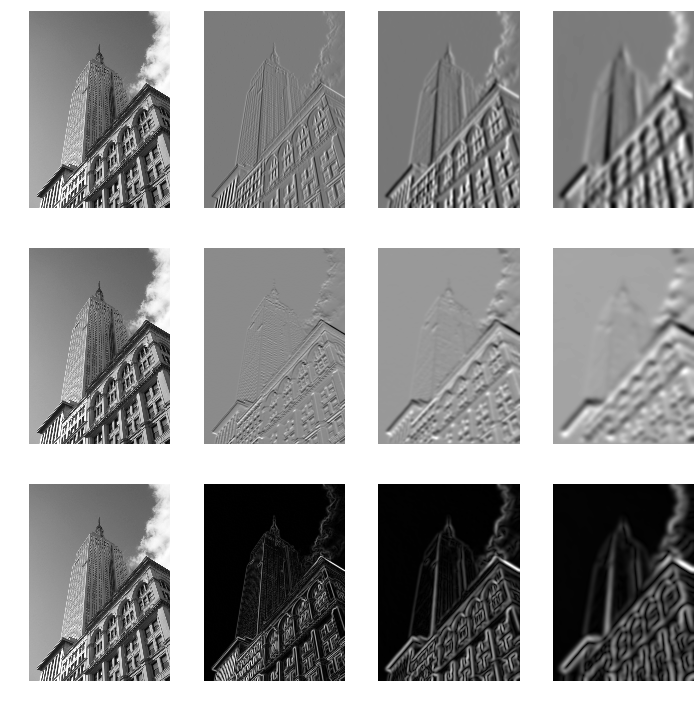

In [23]:
plt.figure(figsize=(12, 12))
for i in range(1, 12, 4):
    plt.subplot(3, 4, i)
    plt.axis('off')
    plt.imshow(im)

col = 2
for sigma in [2, 5, 10]:
    imx = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma, sigma), (0, 1), imx)

    imy = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma, sigma), (1, 0), imy)

    magnitude = np.sqrt(imx**2 + imy**2)
    
    i = col
    for img in [imx, imy, magnitude]:
        plt.subplot(3, 4, i)
        plt.axis('off')
        plt.imshow(img)
        i += 4
    col += 1

plt.show()

### Morphology

* binary image
> http://en.wikipedia.org/wiki/Mathematical_morphology


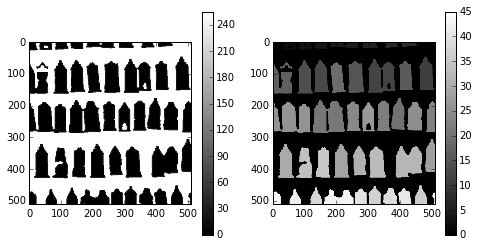

Number of objects:  45


In [59]:
from scipy.ndimage import measurements, morphology

im = np.array(Image.open('data/houses.png').convert('L'))
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.colorbar()

im = 1*(im<128)

labels, nbr_objects = measurements.label(im)

plt.subplot(1, 2, 2)
plt.imshow(labels)
plt.colorbar()
plt.show()

print("Number of objects: ", nbr_objects)

* binary opening

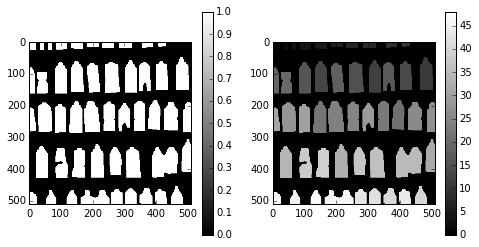

Number of objects:  48


In [60]:
im_open = morphology.binary_opening(im, np.ones((9, 5)), iterations=2)
labels_open, nbr_objects_open = measurements.label(im_open)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(im_open)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(labels_open)
plt.colorbar()

plt.show()

print("Number of objects: ", nbr_objects_open)

In [68]:
from scipy.io import savemat, loadmat
data = {}
x = [1,2,3]
data['x'] = x
scipy.io.savemat('test.mat', data)

In [69]:
data = scipy.io.loadmat('test.mat')
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Fri Nov  6 20:19:35 2015',
 '__version__': '1.0',
 'x': array([[1, 2, 3]])}

In [71]:
from scipy.misc import imsave, lena
lena = scipy.misc.lena()
imsave('test.jpg', lena)

##  1.5 AdvancedExample:ImageDe-Noising

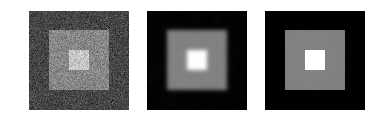

In [81]:
import rof
im = np.zeros((500, 500))
im[100:400, 100:400] = 128
im[200:300, 200:300] = 255
im = im + 30*np.random.standard_normal((500, 500))

U, T = rof.denoise(im, im)
G = filters.gaussian_filter(im, 10)

plt.figure()
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(im)

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(G)

plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(U)

plt.show()

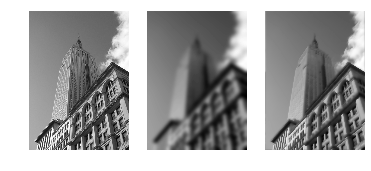

In [79]:
im = np.array(Image.open('data/empire.jpg').convert('L'))
U, T = rof.denoise(im, im)
G = filters.gaussian_filter(im, 10)

plt.figure()
plt.subplot(1, 3, 1)
# plt.axis('equal')
plt.axis('off')
plt.imshow(im)

plt.subplot(1, 3, 2)
# plt.axis('equal')
plt.axis('off')
plt.imshow(G)

plt.subplot(1, 3, 3)
# plt.axis('equal')
plt.axis('off')
plt.imshow(U)

plt.show()